# Basic task
List of referense: w3schools, chatGPT, google and worked with classmates

In [2]:
import numpy as np


# Clean files
def clean_data(text_path, label):
    cleaned_data = []
    with open(text_path, "r") as file:
        next(file)
        for line in file:
            # Split the row by the comma to separate the decimal number
            numbers = line.strip().strip('()').split(',')
            # Convert from string to float and create a numpy-array
            clean_numbers = np.array([float(number) for number in numbers])
            # Add cleaned numbers and label to the list cleaned_data
            cleaned_data.append([clean_numbers, label])
    return cleaned_data


# Load and process
# After the file is cleaned by the above function the label 0/1 is added
pichu_data = clean_data("pichu.txt", 0)[1:]
pikachu_data = clean_data("pikachu.txt", 1)[1:]

# Extract numbers and labels and creates numpy-arrays
pichu_numbers = np.array([data[0] for data in pichu_data])
pichu_labels = np.array([data[1] for data in pichu_data])
pikachu_numbers = np.array([data[0] for data in pikachu_data])
pikachu_labels = np.array([data[1] for data in pikachu_data])

# Put numbers and labels side by side
pichu_data = np.column_stack((pichu_numbers, pichu_labels))
pikachu_data = np.column_stack((pikachu_numbers, pikachu_labels))

# Combine Pichu and Pikachu at axis=0 with a label
combined_data = np.concatenate((pichu_data, pikachu_data), axis=0)


# Read test_points
with open("test_points.txt", "r") as file:
    test_data = file.read()
# Suggestion from Kokchun
# eval is used to convert string to tuples 
# f"[{test_data}]" to create square brackets before eval
test_data = eval(f"[{test_data}]")


# Distance between test_points and combined_points
for i, test_point in enumerate(test_data):
    # Distance between current test_point and combined_data 
    # With the help of euclidean distance
    distances = np.sqrt((combined_data[:,0] - test_point[0])**2 + (combined_data[:,1] - test_point[1])**2)
    # The index with minimun distance to current test_point
    index = np.argmin(distances)
    print(f"Testpoint {i+1}: Closest point is index {index} with distance {distances[index]}")
    correct_pokemon = combined_data[index][2]
    if correct_pokemon == 0:
        print(f"- It's a Pichu!\n")
    else:
        print(f"- It's a Pikachu!\n")

Testpoint 1: Closest point is index 95 with distance 1.8304663206363925
- It's a Pikachu!

Testpoint 2: Closest point is index 43 with distance 11.652774129430805
- It's a Pichu!

Testpoint 3: Closest point is index 23 with distance 3.686062473303827
- It's a Pichu!

Testpoint 4: Closest point is index 96 with distance 1.586203468458903
- It's a Pikachu!



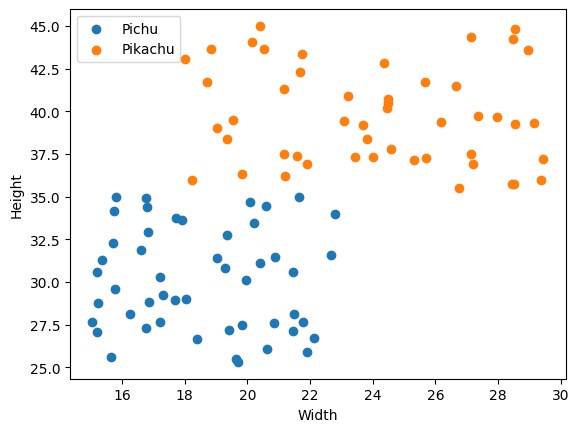

In [14]:
import matplotlib.pyplot as plt

# Plotting
def plot_data(data, label):
    # Extract x and y from the data
    x = [float(row[0]) for row in data]
    y = [float(row[1]) for row in data]

    # Plot x and y. Label marks the different data
    plt.scatter(x, y, label=label)

# Specify the correct label for each data
plot_data(pichu_data, label="Pichu")
plot_data(pikachu_data, label="Pikachu")

plt.legend()
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

# Exercise 1

In [13]:
def get_test_point():
    while True:
        try:
            x = float(input("Enter x-coordinate of the test point: "))
            y = float(input("Enter y-coordinate of the test point: "))
            if x < 0 or y < 0:
                raise ValueError("Coordinates cannot be negative.")
            return (x, y)
        except ValueError as err:
            print(err)
            print("Please enter valid numerical coordinates.")
        except:
            print("An unexpected error occurred. Please try again.")

# Read test_point
test_point = get_test_point()

# Distance between test_point and combined_points
distances = np.sqrt((combined_data[:,0] - test_point[0])**2 + (combined_data[:,1] - test_point[1])**2)
# Index with minimum distance to current test_point
index = np.argmin(distances)
print(f"\nClosest point is index {index} with distance {distances[index]}")
correct_pokemon = combined_data[index][2]
if correct_pokemon == 0:
    print("It's a Pichu!")
else:
    print("It's a Pikachu!")


Closest point is index 97 with distance 2.067557735867901
It's a Pikachu!


# Exercise 2

In [12]:
results = []
for i, test_point in enumerate(test_data):
    distances = np.sqrt((combined_data[:, 0] - test_point[0])**2 + (combined_data[:, 1] - test_point[1])**2)
    # 5 first index with minimum distance to current test_point
    closest_index = np.argsort(distances)[:5]
    # 2 = labels from combined_data. 5 closest points are closest_index
    nearest_labels = combined_data[closest_index, 2]
    # Dictionary to count the closest labels
    label_counts = {}
    for label in nearest_labels:
        # If label exists in dictionary increase by 1
        # If not add with 1
        label_counts[label] = label_counts.get(label, 0) + 1
    # Use max to find the key with largest value
    majority_class = max(label_counts, key=label_counts.get)
    if majority_class == 0:
        print(f"Testpoint {i+1}: It's a Pichu!")
    else:
        print(f"Testpoint {i+1}: It's a Pikachu!")
    results.append((i, majority_class))

Testpoint 1: It's a Pikachu!
Testpoint 2: It's a Pichu!
Testpoint 3: It's a Pichu!
Testpoint 4: It's a Pikachu!
